https://github.com/omdena/wfp/blob/master/task8_preprocessing/30_resize-kansas-13bands.ipynb

## Resizing only script

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
from PIL import Image
from matplotlib.pyplot import imshow
from pathlib import Path
from tqdm import tqdm
import numpy as np
from os import scandir, walk
from skimage import io, transform
import os 
import pandas as pd
from matplotlib import pyplot

In [18]:
plt.rcParams['figure.figsize']=(8,8)

In [19]:
# This function clips the RGB bands and maps the remaining values to the [0, 255] range
def visualize_all_bands(raw, bands=[3,2,1], min_map=0, max_map=2000, nmin=0, nmax=255):
    scale = (nmax-nmin) / (max_map-min_map)
    
 
    seg = raw[...,bands]
    
    seg = np.clip(seg, min_map, max_map)
    
    
    
    for i in range(seg.shape[-1]):
        print(f'Working on dim {i}')
        seg[..., i] = seg[..., i] * scale + nmin - min_map * scale
    
    
    return seg.astype(int)

In [21]:
# if visualize (for single file processing only)
VIZALIZE = True

# for resizing 13 bands cropped images
# MASKS_PROCESSING = False
# path_source = '/home/jupyter/data/kansas_13bands_cropped_by_min_dim/'
# path_target = '/home/jupyter/data/kansas_13bands_cropped_and_resized/'


# ## for resizing mask images:
MASKS_PROCESSING = True
path_source = '/home/jupyter/data/kansas_masks_2016_cropped_by_min_dim/'
path_target = '/home/jupyter/data/kansas_masks_2016_cropped_and_resized/'


# Single file processing

/home/jupyter/data/kansas_masks_2016_cropped_by_min_dim/tile_11400_10500.npy, shape: (915, 915), filesize: 1MB


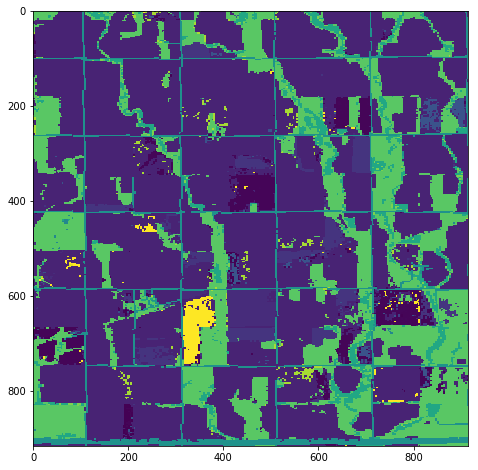

In [50]:
# input files are after cropping 
filename = 'tile_11400_10500.npy'

# if input file is in tif:
# raw = io.imread(str(path_source+filename))
# if input file is in .npy format
raw = np.load(str(path_source+filename))

# visualize the file 
#imshow(visualize_all_bands(raw))
if(VIZALIZE == True):
    if(MASKS_PROCESSING == False):
        # visualize 13bands file before resizing:
        imshow(visualize_all_bands(raw));
    else:
        # visualize masks:
        pyplot.imshow(raw);
        pass;


print('{}, shape: {}, filesize: {}MB'.format(path_source+filename, raw.shape, round(os.path.getsize(path_source+filename)*1e-6)))

/home/jupyter/data/kansas_masks_2016_cropped_and_resized/tile_11400_10500.npy, shape: (500, 500), filesize: 1MB


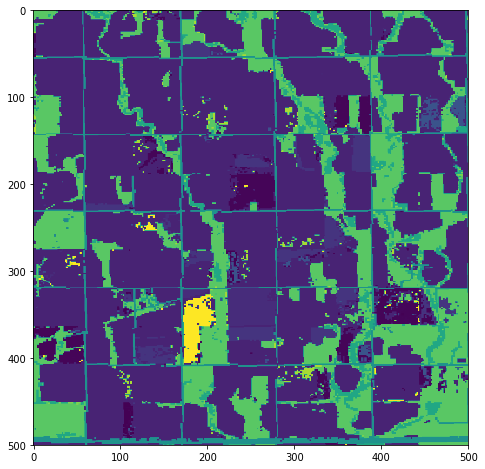

In [51]:
# resize files:
nraw = transform.resize(raw, (500,500), preserve_range=True)
# change dtype to limit size
nraw = nraw.astype(np.int16)

if(VIZALIZE == True):
    # visualize 13bands file:
    if(MASKS_PROCESSING == False):
        imshow(visualize_all_bands(nraw))
    else:
        pyplot.imshow(nraw);
        pass;

# save the file
np.save(path_target+filename, nraw)

print('{}, shape: {}, filesize: {}MB'.format(path_target+filename, nraw.shape, round(os.path.getsize(path_target+filename)*1e-6)))

# All files processing

In [65]:
%%time

# in the loop:
i = 0

for r, d, f in walk(path_source):

    if r != path_source:
        break
    print(f'In directory {r}: {len(f)} files')
    for filename in f:

        print(f'{i} working on img {path_source+filename}')
        
        # if input file is in tif:
        # raw = io.imread(str(path_source+filename))
        # if input file is in .npy format
        raw = np.load(str(path_source+filename))
        print('{}, shape: {}, filesize: {}MB'.format(path_source+filename, raw.shape, round(os.path.getsize(path_source+filename)*1e-6)))
        # resize files:
        nraw = transform.resize(raw, (500,500), preserve_range=True)
        # change dtype to limit size
        nraw = nraw.astype(np.int16)
        # save the file
        np.save(path_target+filename, nraw)

        print('{}, shape: {}, filesize: {}MB'.format(path_target+filename, nraw.shape, round(os.path.getsize(path_target+filename)*1e-6)))
        i = i + 1 
print('processed {} files'.format(i))

# Check the results

Working on dim 0
Working on dim 1
Working on dim 2


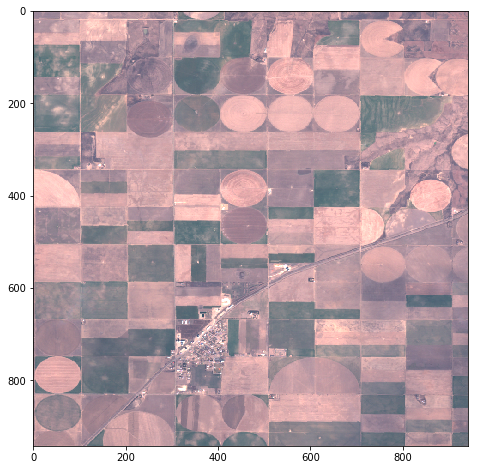

In [61]:
n_cropped_only = np.load('/home/jupyter/data/kansas_13bands_cropped_by_min_dim/tile_2400_9900.npy')
#print(path_dest+filename_dest)

imshow(visualize_all_bands(n_cropped_only))

Working on dim 0
Working on dim 1
Working on dim 2


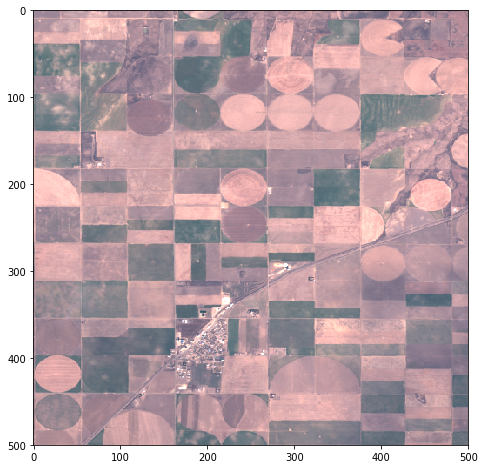

In [62]:
n_resized = np.load('/home/jupyter/data/kansas_13bands_cropped_and_resized/tile_2400_9900.npy')
#print(path_dest+filename_dest)

imshow(visualize_all_bands(n_resized))

# Show masks

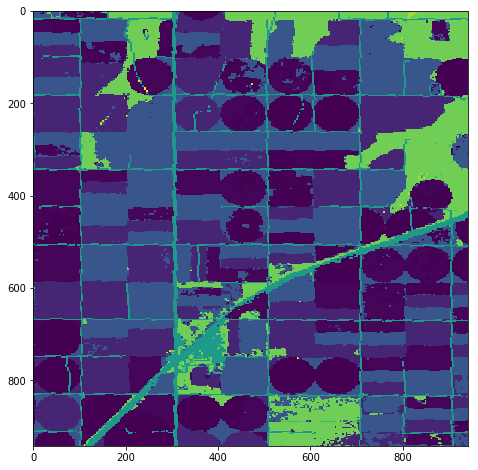

In [63]:
path_source = '/home/jupyter/data/kansas_masks_2016_cropped_by_min_dim/'
filename = 'tile_2400_9900.npy'

mask_cropped = np.load(path_source + filename)
pyplot.imshow(mask_cropped, );

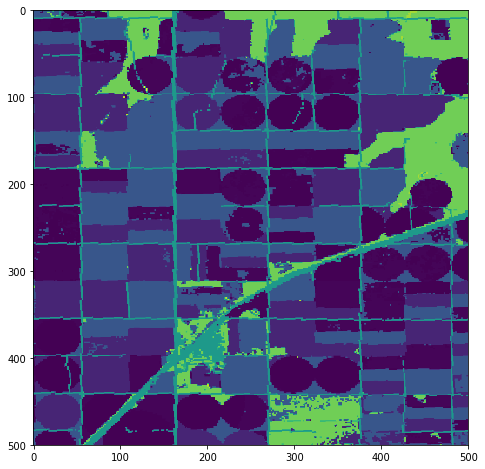

In [64]:
path_target = '/home/jupyter/data/kansas_masks_2016_cropped_and_resized/'
filename = 'tile_2400_9900.npy'

mask_cropped = np.load(path_target + filename)
pyplot.imshow(mask_cropped, );